# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from sklearn import manifold
from sklearn.metrics import accuracy_score

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper , ColorBar
from bokeh.palettes import brewer

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Marriage.csv')

# Descriptive Analysis

In [4]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [5]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


# Data Wrangling

In [6]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

# Statistical Analysis

In [7]:
col_names=list(df.columns)

In [8]:
def normaltest(col_name,df):
    stat,p=stats.normaltest(df[col_name])
    alpha=0.05
    if p>alpha:
        print(col_name,'--------------------Sample looks Gauss')
    else:
        print(col_name,'----------------------Sample does not look Gauss')
    
    return (stat,p)

In [9]:
normal_test_stat=[]
normal_test_p=[]
for i in col_names:
    s,p=normaltest(i,df)
    normal_test_stat.append(s)
    normal_test_p.append(p)

Sorry_end ----------------------Sample does not look Gauss
Ignore_diff ----------------------Sample does not look Gauss
begin_correct ----------------------Sample does not look Gauss
Contact ----------------------Sample does not look Gauss
Special_time ----------------------Sample does not look Gauss
No_home_time ----------------------Sample does not look Gauss
2_strangers ----------------------Sample does not look Gauss
enjoy_holiday ----------------------Sample does not look Gauss
enjoy_travel ----------------------Sample does not look Gauss
common_goals ----------------------Sample does not look Gauss
harmony ----------------------Sample does not look Gauss
freeom_value ----------------------Sample does not look Gauss
entertain ----------------------Sample does not look Gauss
people_goals ----------------------Sample does not look Gauss
dreams ----------------------Sample does not look Gauss
love ----------------------Sample does not look Gauss
happy ----------------------Sample doe

In [10]:
stats_df = pd.DataFrame(list(zip(normal_test_stat,normal_test_p)),
              columns=['stat','p'],index=col_names)
stats_df['Gaussian']=[1 if x > 0.05 else 0 for x in stats_df['p']]
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Sorry_end to Divorce_Y_N
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stat      55 non-null     float64
 1   p         55 non-null     float64
 2   Gaussian  55 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.7+ KB


# Visualization

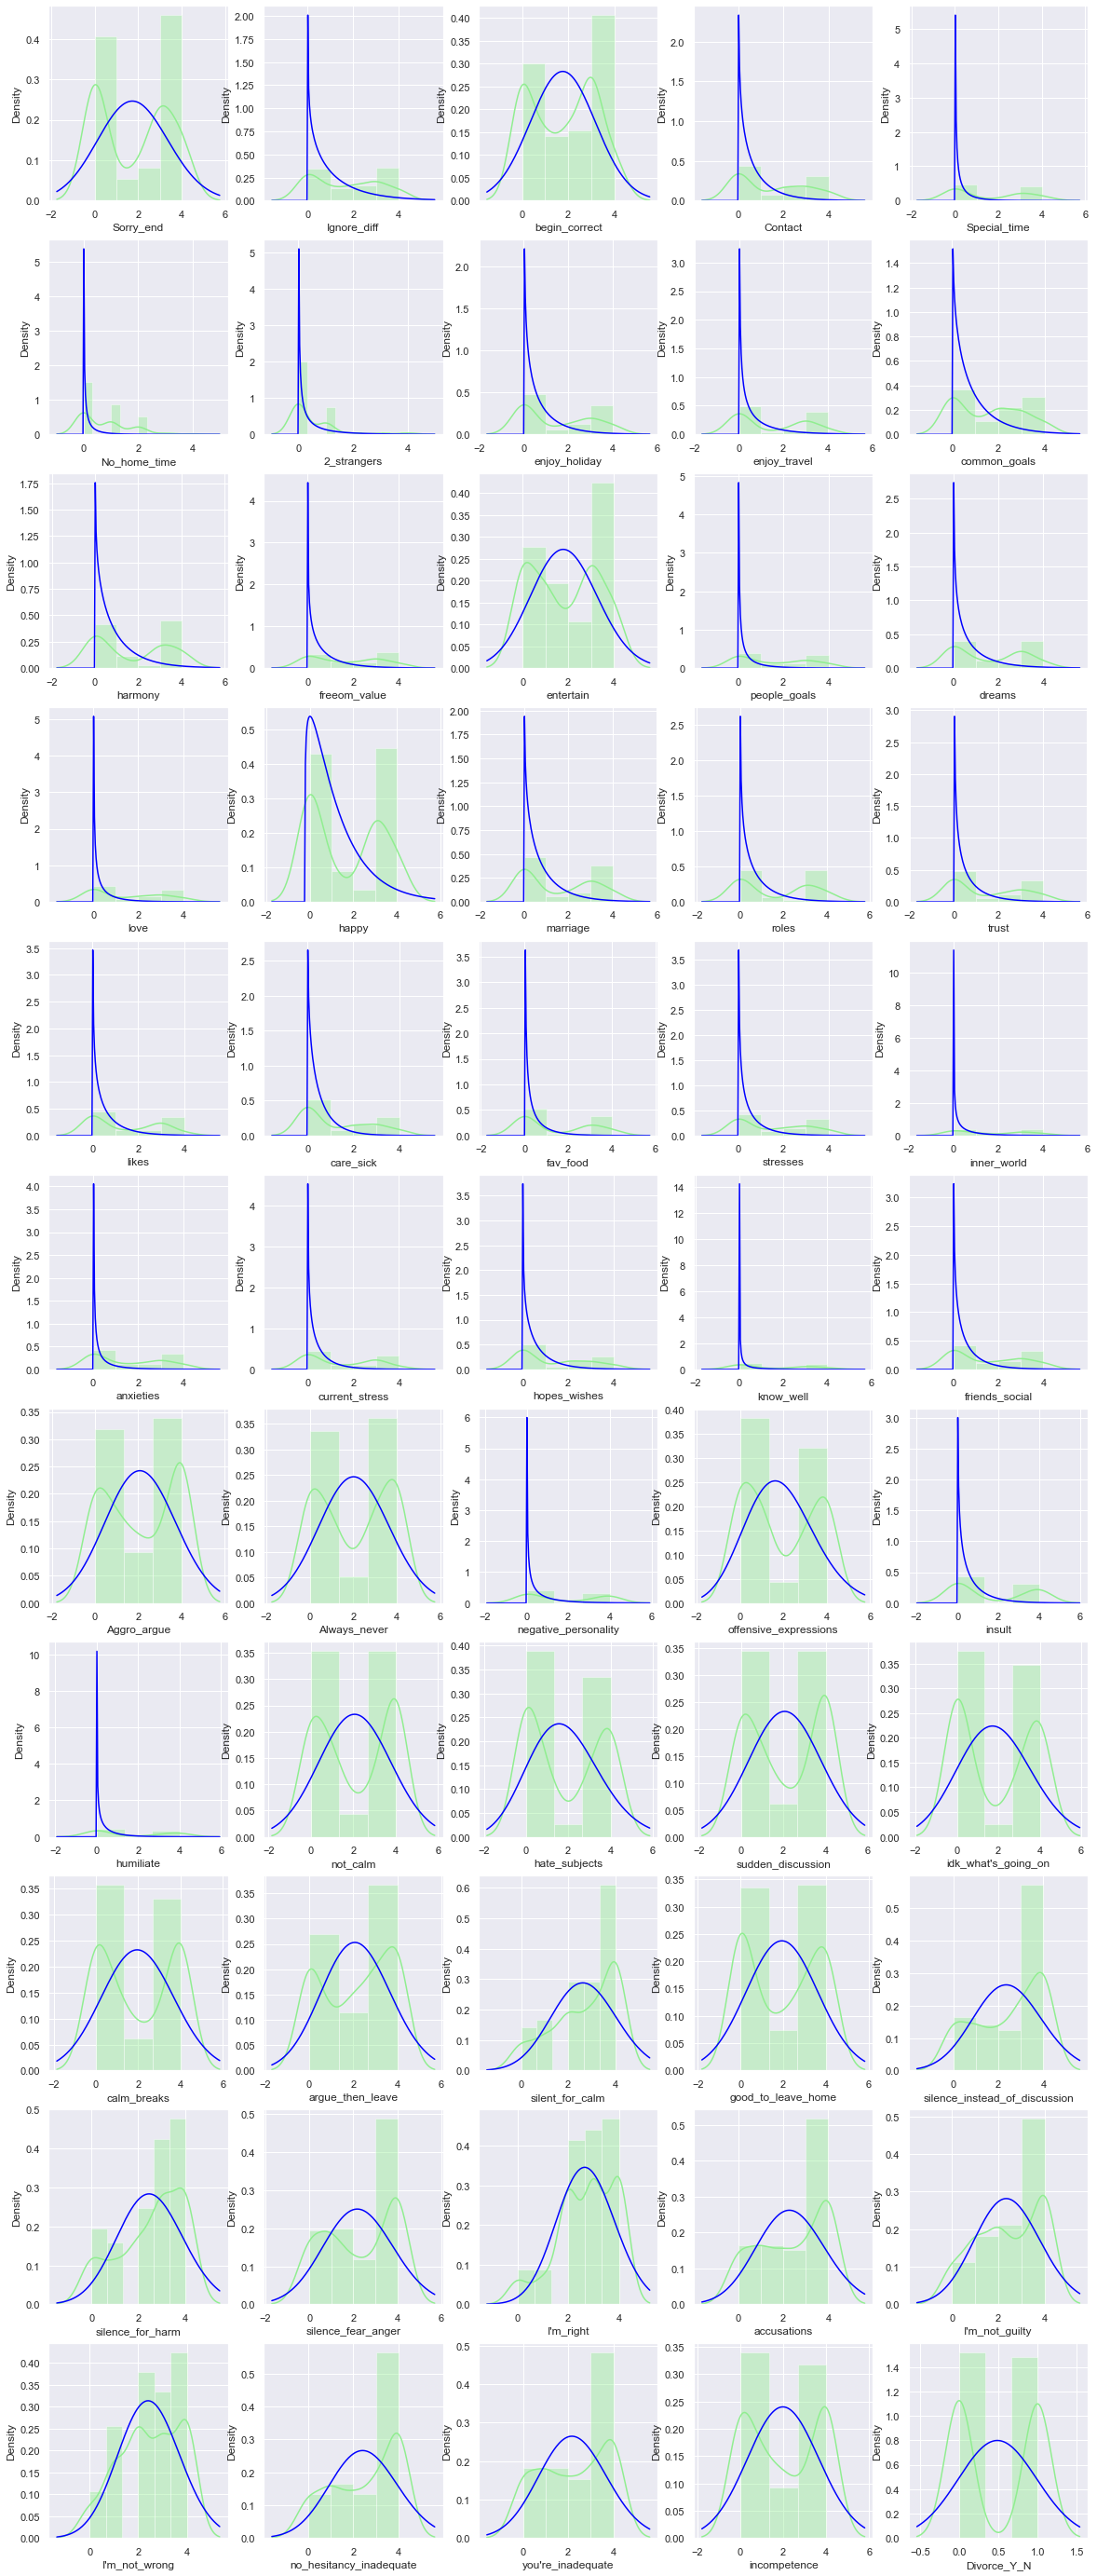

In [11]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names, 1):
    plt.subplot(11,5,i)
    p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")

# Co-Realation Analysis

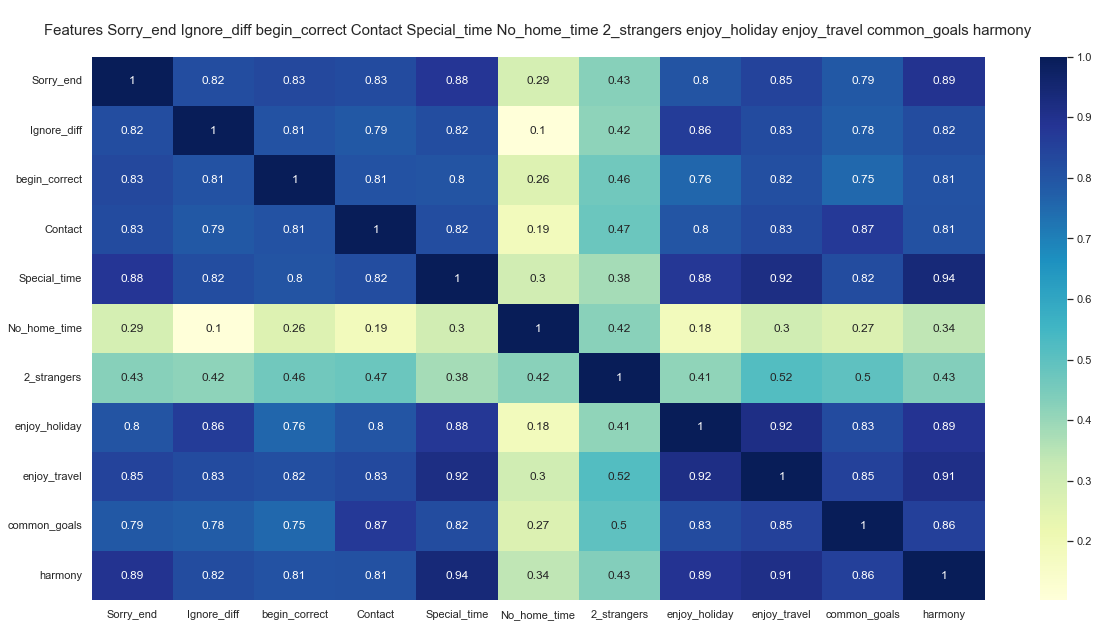

In [12]:
corr=df[col_names[:11]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[:11]])+"\n",fontsize=15);

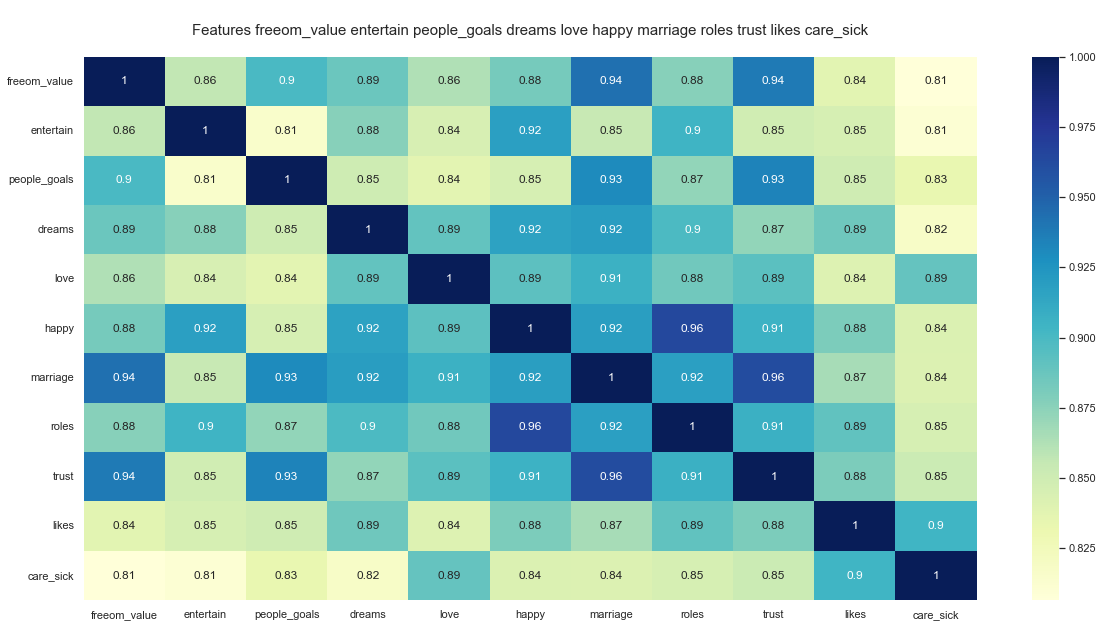

In [13]:
corr=df[col_names[11:22]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[11:22]])+"\n",fontsize=15);

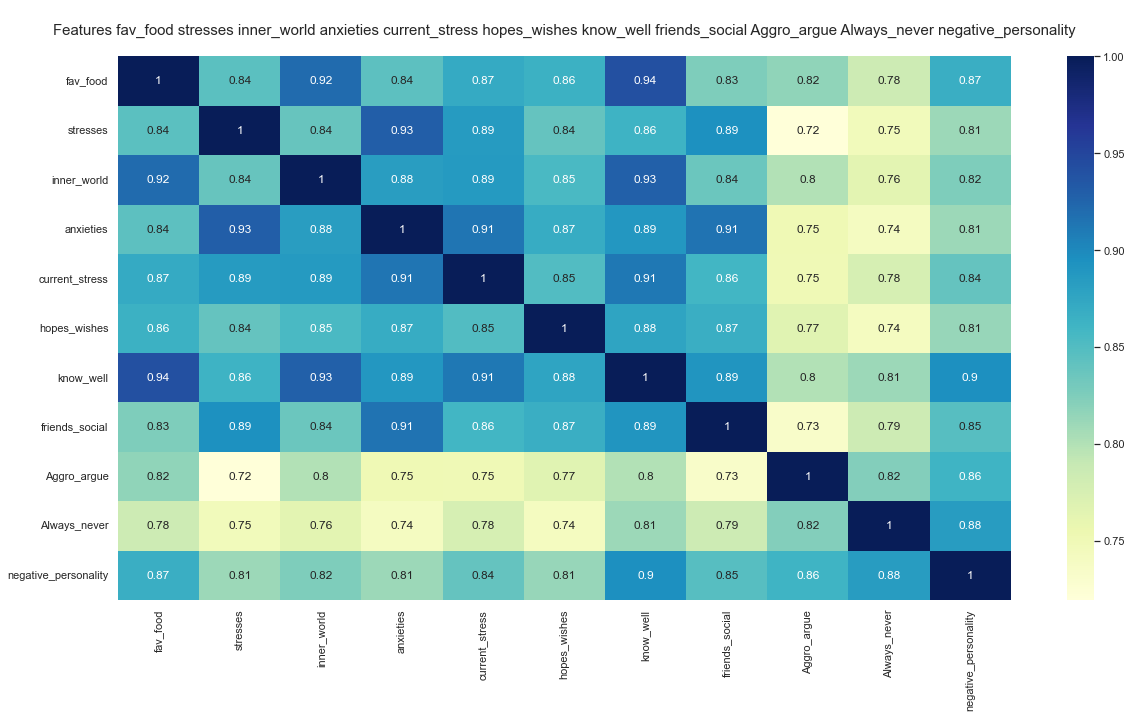

In [14]:
corr=df[col_names[22:33]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[22:33]])+"\n",fontsize=15);

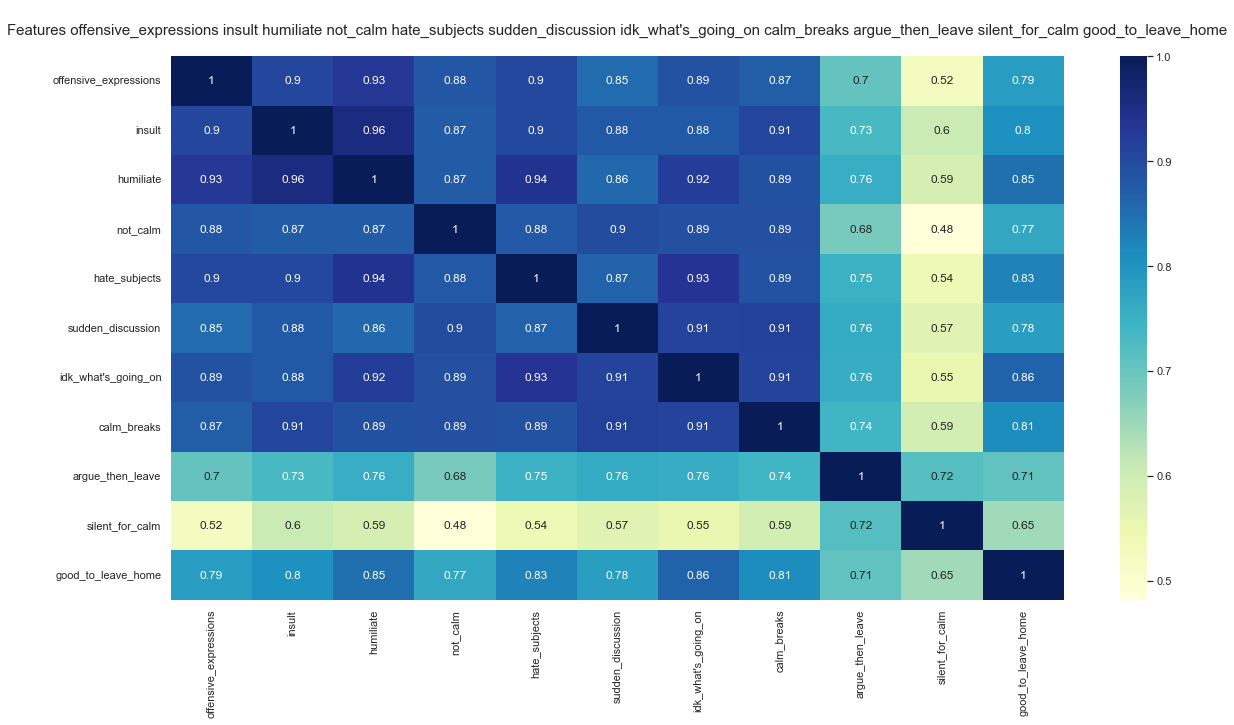

In [15]:
corr=df[col_names[33:44]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[33:44]])+"\n",fontsize=15);

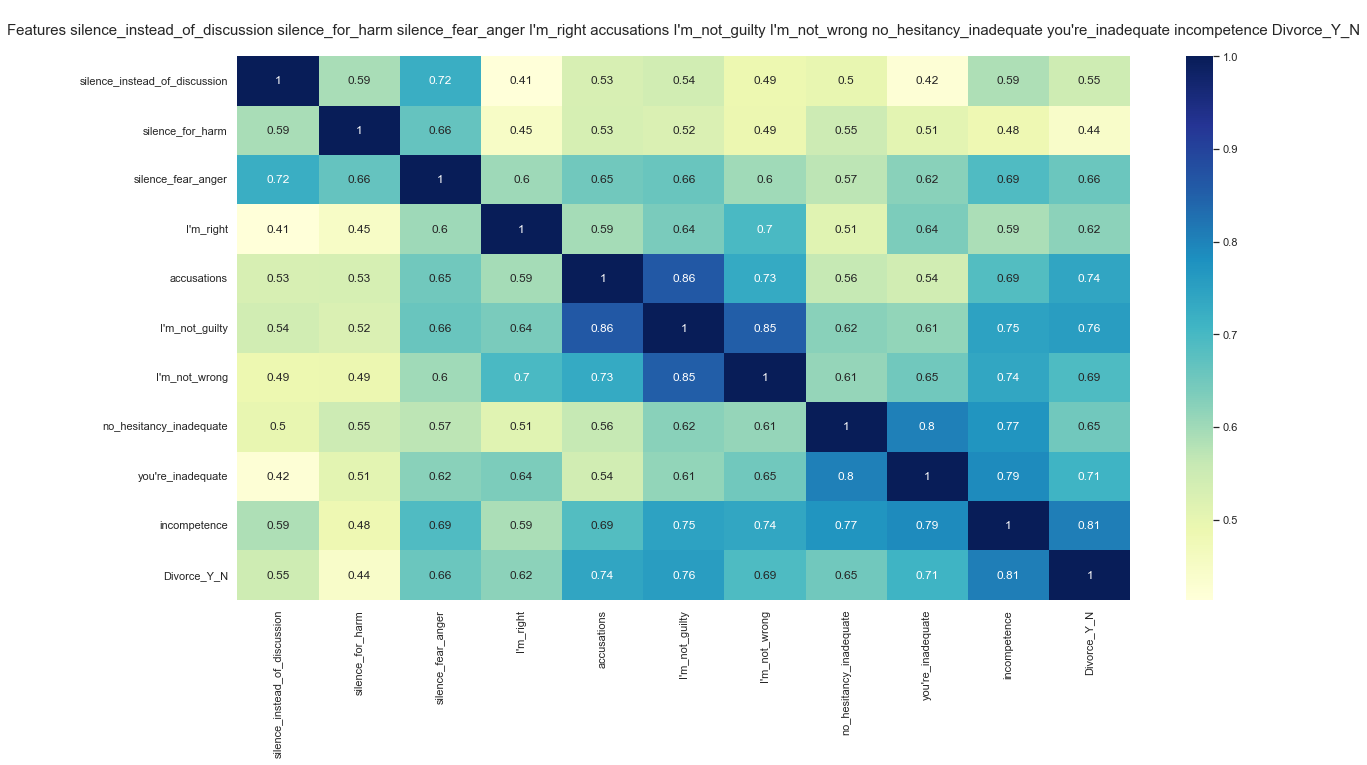

In [16]:
corr=df[col_names[44:55]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[44:55]])+"\n",fontsize=15);

In [17]:
col_names.remove('Divorce_Y_N')

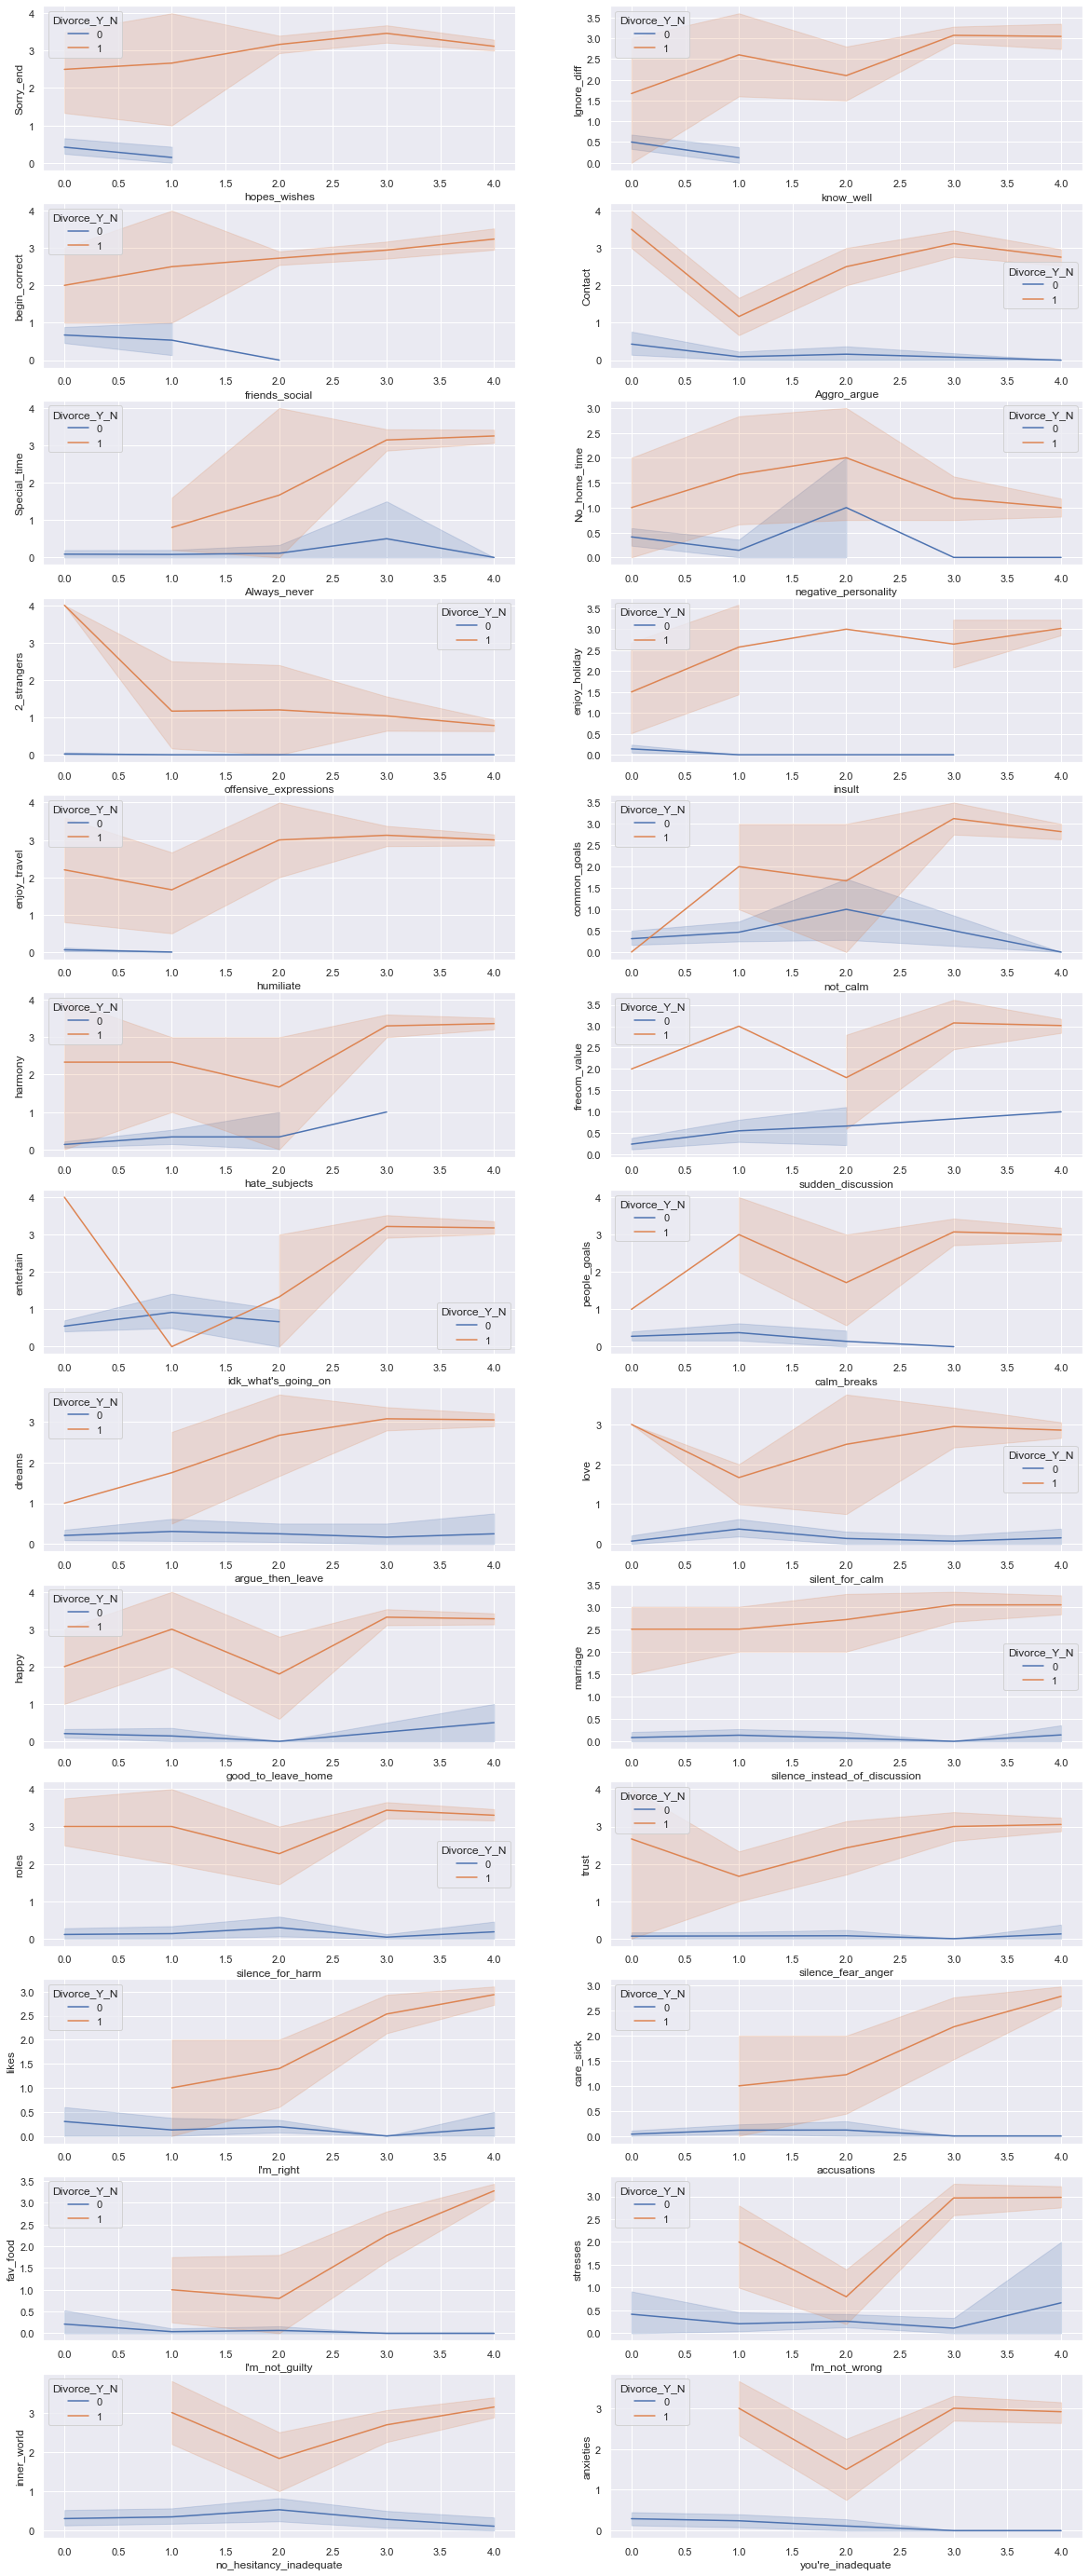

In [18]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names[:26], 1):
    x=col_names[i+26]
    plt.subplot(13,2,i)
    p=sns.lineplot(hue='Divorce_Y_N',x=x,y=column,data=df,color='blue')

# Conclusion

In [ ]:
#Mutal communication and belief are the key of successfull marriage